In [11]:
%load_ext autoreload
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.insert(0,"../")
import oslo_method_python as om
import copy
from matplotlib.colors import LogNorm
%autoreload 2
%matplotlib notebook

from uncertainties import unumpy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Testing how the unumpy module works by looking at its behaviour on my spectra

In [12]:
firstgen = om.Matrix()
firstgen.load("error_propagation_ensemble/firstgen-orig.m")

firstgen_std = om.Matrix()
firstgen_std.load("error_propagation_ensemble/firstgen_std.m")

In [14]:
u_firstgen = unumpy.uarray(firstgen.matrix, firstgen_std.matrix)

<IPython.core.display.Javascript object>


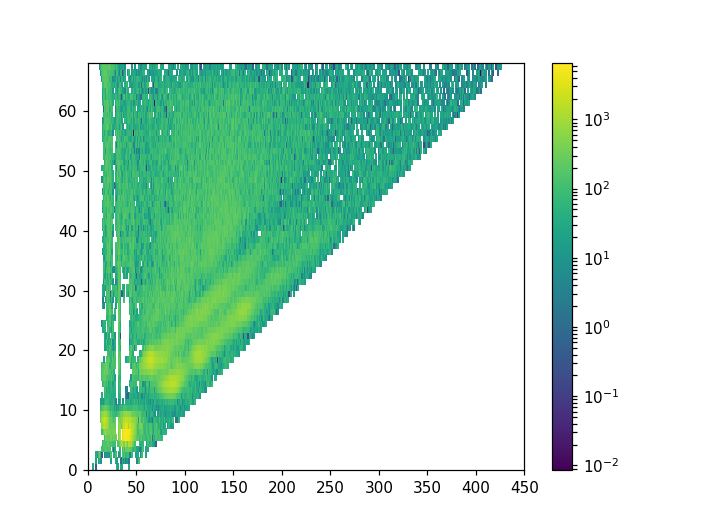

In [26]:
f, ax = plt.subplots(1,1)
cbar = ax.pcolormesh(unumpy.nominal_values(u_firstgen), norm=LogNorm())
f.colorbar(cbar, ax=ax)
plt.show()

<IPython.core.display.Javascript object>


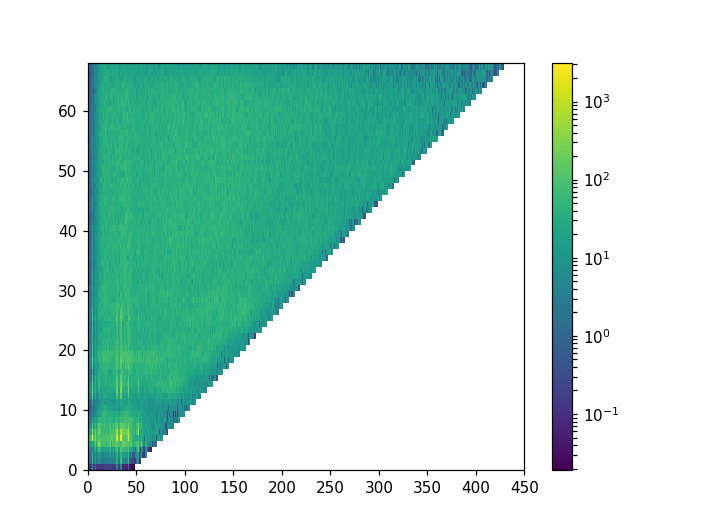

In [32]:
f, ax = plt.subplots(1,1)
cbar = ax.pcolormesh(unumpy.std_devs(u_firstgen), norm=LogNorm())
f.colorbar(cbar, ax=ax)
plt.show()

## Normalize each row

In [37]:
u_firstgen_norm = u_firstgen / np.sum(u_firstgen, axis=1)[:,None]

<IPython.core.display.Javascript object>


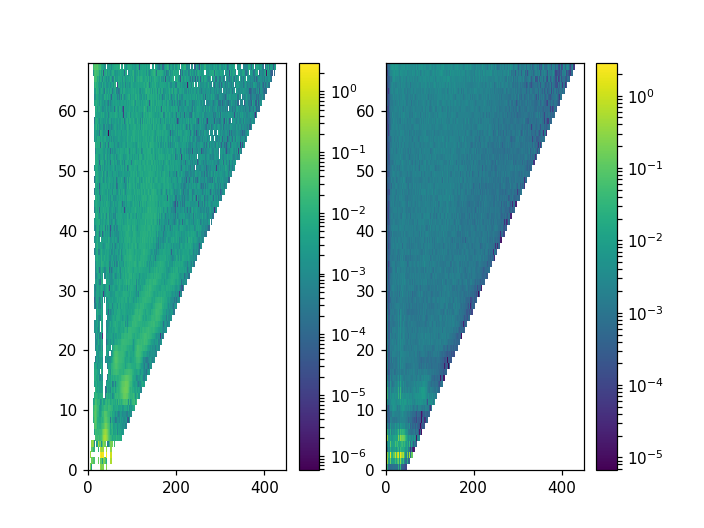

In [38]:
f, (ax1, ax2) = plt.subplots(1,2)
cbar1 = ax1.pcolormesh(unumpy.nominal_values(u_firstgen_norm), norm=LogNorm())
f.colorbar(cbar1, ax=ax1)
cbar2 = ax2.pcolormesh(unumpy.std_devs(u_firstgen_norm), norm=LogNorm())
f.colorbar(cbar2, ax=ax2)
plt.show()

<IPython.core.display.Javascript object>


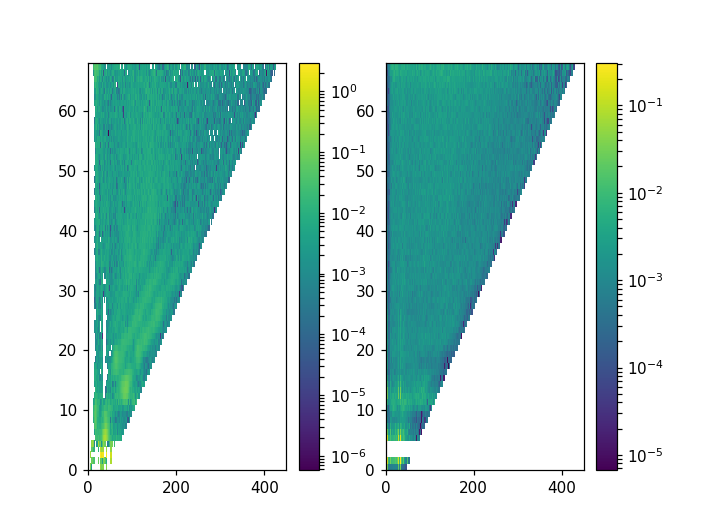

In [42]:
# Is it any different from simply dividing both counts and std by normalization?
# I.e., is there some probability-theory that I'm not considering in the std normalization?

firstgen_norm = firstgen.matrix/np.sum(firstgen.matrix, axis=1)[:,None]
firstgen_std_norm = om.div0(firstgen_std.matrix, np.sum(firstgen.matrix, axis=1)[:,None]) # Still divide by firstgen.matrix

f, (ax1, ax2) = plt.subplots(1,2)
cbar1 = ax1.pcolormesh(firstgen_norm, norm=LogNorm())
f.colorbar(cbar1, ax=ax1)
cbar2 = ax2.pcolormesh(firstgen_std_norm, norm=LogNorm())
f.colorbar(cbar2, ax=ax2)
plt.show()